The oportunity of founding a company has come to a group of Mexican businessmen, now they have to decide where the headquarters will be located, having in consideration the most convinient location for the growth of the business. 

# MARKET RESEARCH

The first decision is to establish in the US taking into account the factors that make this country attractive to business, and of course the oprtunities and well placed location.

In [56]:
##With web-scrap we´re gonna find the top 20 cities to start a business according to 
##https://www.entrepreneur.com/article/333377
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import plugins
%matplotlib inline
url = 'https://www.entrepreneur.com/article/333377'
t20 = requests.get(url)


t20_cont=t20.content
soup=bs(t20_cont, 'html.parser')
top=[]

table = soup.find("div",{"class":"gate-check"})

for p in table.find_all("li"):
    top.append(p.text)
top=[re.sub(r',\s\w+', '', i) for i in top]        
top

['Orlando',
 'Oklahoma City',
 'Miami',
 'Austin',
 'Tampa',
 'Charlotte',
 'Durham',
 'Raleigh',
 'Atlanta',
 'Denver',
 'Fort Worth',
 'Jacksonville',
 'Houston',
 'St. Petersburg',
 'Dallas',
 'San Antonio',
 'Irving',
 'Laredo',
 'Oakland',
 'Irvine']

In [2]:
top
rnk=[i for i in range(1,21)]
dict={'city':top,'rank':rnk}
top_df=pd.DataFrame(dict)
top_df

,city,rank
0,Orlando,1
1,Oklahoma City,2
2,Miami,3
3,Austin,4
4,Tampa,5
5,Charlotte,6
6,Durham,7
7,Raleigh,8
8,Atlanta,9
9,Denver,10


In [3]:
##tabla Cost of living plus rent 

import re
url = 'https://www.numbeo.com/cost-of-living/region_rankings_current.jsp?region=019&displayColumn=2'
resp = requests.get(url)
soup = bs(resp.content, "html.parser")
rows = soup.findAll("a",{"class":"discreet_link"})
cty=[]
for i in rows:
    cty.append(i.text.replace(", United States",""))

cty=[re.sub(r',\s\w+', '', i) for i in cty]        
cty




['Hamilton',
 'New York',
 'Brooklyn',
 'Honolulu',
 'San Francisco',
 'Anchorage',
 'Oakland',
 'Nassau',
 'Boston',
 'Seattle',
 'Alexandria',
 'Jersey City',
 'Washington',
 'Chicago',
 'Charleston',
 'Los Angeles',
 'Miami',
 'Minneapolis',
 'Sacramento',
 'Fort Lauderdale',
 'Irvine',
 'Pittsburgh',
 'San Jose',
 'Portland',
 'Tampa',
 'Milwaukee',
 'Cleveland',
 'Asheville',
 'San Diego',
 'Philadelphia',
 'Atlanta',
 'New Orleans',
 'Birmingham',
 'Kingston',
 'Charlotte',
 'Denver',
 'Toronto',
 'Everett',
 'Baltimore',
 'Burnaby',
 'Vancouver',
 'Ann Arbor',
 'Bellingham',
 'Fredericton',
 'Rochester',
 'Red Deer',
 'Halifax',
 'Surrey',
 'Albany',
 'San Juan Rico',
 'Spokane',
 'Colorado Springs',
 'Victoria',
 'Edmonton',
 'Nashville',
 'Calgary',
 'Columbus',
 'Kansas City',
 'Mississauga',
 'Olympia',
 'Knoxville',
 'Riverside',
 'Nanaimo',
 'Jacksonville',
 'Richmond',
 'Saskatoon',
 'Fort Worth',
 'Buffalo',
 'Raleigh',
 'Omaha',
 'Las Vegas',
 'Madison',
 'Orlando',
 'B

In [4]:
url1 = 'https://www.numbeo.com/cost-of-living/region_rankings_current.jsp?region=019&displayColumn=2'
resp1 = requests.get(url1)
soup1 = bs(resp1.content, "html.parser")
rows1 = soup1.findAll("td",{"style":"text-align: right"})
indx=[]
for i in rows1:
    indx.append(i.text)
indx




['115.25',
 '100.00',
 '88.21',
 '78.97',
 '100.48',
 '63.96',
 '84.58',
 '63.69',
 '81.62',
 '76.36',
 '71.46',
 '74.62',
 '79.61',
 '68.37',
 '64.94',
 '75.40',
 '68.73',
 '61.96',
 '62.17',
 '66.51',
 '72.25',
 '57.17',
 '79.51',
 '63.01',
 '59.55',
 '56.04',
 '57.88',
 '58.95',
 '70.90',
 '61.57',
 '62.19',
 '58.36',
 '52.81',
 '52.22',
 '59.26',
 '63.03',
 '62.28',
 '59.14',
 '58.54',
 '57.93',
 '61.32',
 '61.86',
 '55.98',
 '47.97',
 '51.56',
 '48.07',
 '52.21',
 '54.30',
 '53.08',
 '49.21',
 '51.08',
 '54.03',
 '55.92',
 '49.63',
 '58.95',
 '50.39',
 '51.91',
 '50.59',
 '56.73',
 '55.15',
 '51.82',
 '56.91',
 '49.21',
 '51.46',
 '52.07',
 '47.20',
 '51.45',
 '48.36',
 '52.69',
 '49.91',
 '52.76',
 '52.85',
 '54.36',
 '52.80',
 '48.66',
 '51.02',
 '54.17',
 '47.57',
 '51.65',
 '50.64',
 '49.70',
 '52.76',
 '54.74',
 '47.02',
 '54.20',
 '51.43',
 '45.77',
 '47.66',
 '50.45',
 '43.76',
 '47.77',
 '47.51',
 '46.84',
 '47.00',
 '47.49',
 '55.96',
 '45.87',
 '50.16',
 '45.23',
 '45.96

In [5]:
dict={'city':cty,'Cost of living plus rent':indx}
clr_df=pd.DataFrame(dict)
clr_df

,city,Cost of living plus rent
0,Hamilton,115.25
1,New York,100.00
2,Brooklyn,88.21
3,Honolulu,78.97
4,San Francisco,100.48
...,...,...
152,Barranquilla,18.36
153,Medellin,18.79
154,Salvador,17.35
155,Bucaramanga,16.27


In [6]:
##tabla local purchasing power

url_3 = 'https://www.numbeo.com/cost-of-living/region_rankings_current.jsp?region=021&displayColumn=5'
resp_3 = requests.get(url_3)
soup_3 = bs(resp_3.content, "html.parser")
rows_3= soup_3.findAll("td",{"class":"cityOrCountryInIndicesTable"})
lpp_=[]
for i in rows_3:
    lpp_.append(i.text.replace(", United States",""))
lpp_=[re.sub(r',\s\w+', '', i) for i in lpp_]        
lpp_

['Hamilton',
 'New York',
 'Brooklyn',
 'Honolulu',
 'San Francisco',
 'Anchorage',
 'Oakland',
 'Boston',
 'Seattle',
 'Alexandria',
 'Jersey City',
 'Washington',
 'Chicago',
 'Charleston',
 'Los Angeles',
 'Miami',
 'Minneapolis',
 'Sacramento',
 'Fort Lauderdale',
 'Irvine',
 'Pittsburgh',
 'San Jose',
 'Portland',
 'Tampa',
 'Milwaukee',
 'Cleveland',
 'Asheville',
 'San Diego',
 'Philadelphia',
 'Atlanta',
 'New Orleans',
 'Birmingham',
 'Kingston',
 'Charlotte',
 'Denver',
 'Toronto',
 'Everett',
 'Baltimore',
 'Burnaby',
 'Vancouver',
 'Ann Arbor',
 'Bellingham',
 'Fredericton',
 'Rochester',
 'Red Deer',
 'Halifax',
 'Surrey',
 'Albany',
 'Spokane',
 'Colorado Springs',
 'Victoria',
 'Edmonton',
 'Nashville',
 'Calgary',
 'Columbus',
 'Kansas City',
 'Mississauga',
 'Olympia',
 'Knoxville',
 'Riverside',
 'Nanaimo',
 'Jacksonville',
 'Richmond',
 'Saskatoon',
 'Fort Worth',
 'Buffalo',
 'Raleigh',
 'Omaha',
 'Las Vegas',
 'Madison',
 'Orlando',
 'Brampton',
 'Des Moines',
 'Eu

In [7]:
url_4 = 'https://www.numbeo.com/cost-of-living/region_rankings_current.jsp?region=021&displayColumn=5'
resp_4 = requests.get(url_4)
soup_4 = bs(resp_4.content, "html.parser")
rows_4 = soup_4.findAll("td",{"style":"text-align: right"})
mlpp_=[]
for i in rows_4:
    mlpp_.append(i.text)
mlpp_

['82.31',
 '100.00',
 '84.47',
 '74.62',
 '144.89',
 '118.62',
 '100.48',
 '109.18',
 '134.71',
 '151.56',
 '120.93',
 '117.75',
 '109.78',
 '104.49',
 '108.42',
 '86.45',
 '122.13',
 '111.12',
 '102.66',
 '141.11',
 '111.53',
 '148.55',
 '106.73',
 '114.95',
 '90.83',
 '94.05',
 '104.56',
 '127.03',
 '93.55',
 '132.09',
 '86.79',
 '91.60',
 '76.87',
 '128.65',
 '123.91',
 '85.88',
 '107.67',
 '110.64',
 '83.65',
 '94.09',
 '118.74',
 '94.34',
 '86.23',
 '106.07',
 '100.86',
 '74.16',
 '80.39',
 '117.99',
 '100.17',
 '113.96',
 '85.03',
 '91.22',
 '116.65',
 '115.51',
 '137.91',
 '119.45',
 '94.30',
 '121.88',
 '100.73',
 '103.06',
 '61.93',
 '120.32',
 '115.59',
 '92.10',
 '125.78',
 '107.54',
 '138.63',
 '117.89',
 '118.47',
 '119.66',
 '109.64',
 '83.99',
 '122.41',
 '98.65',
 '79.00',
 '101.79',
 '100.86',
 '92.98',
 '111.23',
 '130.26',
 '85.09',
 '86.84',
 '134.30',
 '123.32',
 '92.73',
 '122.97',
 '124.11',
 '106.35',
 '87.78',
 '85.77',
 '119.12',
 '89.53',
 '120.77',
 '154.13'

In [8]:
dict={'city':lpp_,'Local purchasing power':mlpp_}
lpp_df_=pd.DataFrame(dict)
lpp_df_

,city,Local purchasing power
0,Hamilton,82.31
1,New York,100.00
2,Brooklyn,84.47
3,Honolulu,74.62
4,San Francisco,144.89
...,...,...
106,Huntsville,133.40
107,Wichita,119.39
108,Lexington,130.60
109,El Paso,127.34


In [9]:
cities_index_=pd.merge(clr_df,lpp_df_,on='city',how='inner')

In [47]:
##Let`s create a new column that represents the purchase power minus the cost of living, 
##I`m gonna call it: Final Purchasing Power
cities_index_['Local purchasing power'] = pd.to_numeric(cities_index_['Local purchasing power'])
cities_index_['Cost of living plus rent'] = pd.to_numeric(cities_index_['Cost of living plus rent'])
cities_index_['Final Purchasing Power']=cities_index_['Local purchasing power']-cities_index_['Cost of living plus rent']
#cities_index_.drop(['Local purchasing power', 'Cost of living plus rent','Purchasing Power-Cost of living'], axis=1, inplace=True)
cities_index_



,city,Cost of living plus rent,Local purchasing power,Final Purchasing Power
0,Hamilton,115.25,82.31,-32.94
1,Hamilton,115.25,87.78,-27.47
2,Hamilton,47.77,82.31,34.54
3,Hamilton,47.77,87.78,40.01
4,New York,100.00,100.00,0.00
...,...,...,...,...
109,Huntsville,45.25,133.40,88.15
110,Wichita,41.90,119.39,77.49
111,Lexington,43.72,130.60,86.88
112,El Paso,39.81,127.34,87.53


In [11]:
##tabla traffic
url_tr = 'https://www.numbeo.com/traffic/country_result.jsp?country=United+States'
resp_tr = requests.get(url_tr)
soup_tr = bs(resp_tr.content, "html.parser")
soup_tr
table_tr = soup_tr.find("table",{"id":"t2"})
filas_tr = table_tr.findAll("tr")
filas_tr.pop(0)

<tr>
<th><div style="font-size: 80%; vertical-align: middle;">Rank</div></th>
<th><div style="font-size: 95%;">City</div></th>
<th><div style="font-size: 90%;">Traffic Index</div></th>
<th><div style="font-size: 90%;">Time Index<br/>(in minutes)</div></th>
<th><div style="font-size: 90%;">Time Exp. Index</div></th>
<th><div style="font-size: 90%;">Inefficiency Index</div></th>
<th><div style="font-size: 90%;">CO<sub>2</sub> Emission Index</div></th>
</tr>

In [12]:
trf = []

for i in filas_tr:
    cty = i.findAll("td")[1].text
    #cty = re.sub("\(.*\)","",cty).strip()
    tr_index = i.findAll("td")[2].text.strip()
    co2=i.findAll("td")[6].text.strip()
    
    row = {"city": cty,"Traffic Index": tr_index,'CO2 Emission Index':co2}
    trf.append(row)
    

traffic_df = pd.DataFrame(trf)
traffic_df
traffic_df['city'] =  [re.sub(r',\s\w+','', str(x)) for x in traffic_df['city']]
traffic_df   


,city,Traffic Index,CO2 Emission Index
0,Los Angeles,344.10,15320.45
1,San Francisco,272.02,9983.23
2,Detroit,234.40,11136.94
3,Miami,215.95,10795.32
4,Boston,209.21,8151.80
5,Houston,205.01,10355.03
6,Atlanta,204.53,9721.40
7,Honolulu,202.12,10340.90
8,Washington,192.86,8349.27
9,Chicago,191.72,7547.73


In [13]:
city_rank=pd.merge(cities_index_,traffic_df,on='city',how='inner')
city_rank

,city,Cost of living plus rent,Local purchasing power,Final Purchasing Power,Traffic Index,CO2 Emission Index
0,New York,100.00,100.00,0.00,165.86,3104.18
1,Honolulu,78.97,74.62,-4.35,202.12,10340.90
2,San Francisco,100.48,144.89,44.41,272.02,9983.23
3,Anchorage,63.96,118.62,54.66,133.13,6543.60
4,Oakland,84.58,100.48,15.90,164.98,6406.41
5,Boston,81.62,109.18,27.56,209.21,8151.80
6,Seattle,76.36,134.71,58.35,191.28,7618.25
7,Washington,79.61,117.75,38.14,192.86,8349.27
8,Chicago,68.37,109.78,41.41,191.72,7547.73
9,Charleston,64.94,104.49,39.55,146.19,8012.64


In [14]:
##merging the first dataframe containing the top 20 cities to start a business with the quality
##index
decision_rank=pd.merge(top_df,city_rank,on='city',how='inner')
decision_rank




,city,rank,Cost of living plus rent,Local purchasing power,Final Purchasing Power,Traffic Index,CO2 Emission Index
0,Orlando,1,54.36,109.64,55.28,178.59,9649.50
1,Miami,3,68.73,86.45,17.72,215.95,10795.32
2,Austin,4,56.27,136.15,79.88,162.41,8323.00
3,Tampa,5,59.55,114.95,55.40,173.19,9387.38
4,Charlotte,6,59.26,128.65,69.39,167.24,8712.75
5,Raleigh,8,52.69,138.63,85.94,150.65,7968.35
6,Atlanta,9,62.19,132.09,69.90,204.53,9721.40
7,Denver,10,63.03,123.91,60.88,173.60,8640.65
8,Fort Worth,11,51.45,125.78,74.33,119.84,6157.77
9,Jacksonville,12,51.46,120.32,68.86,174.64,9453.23


This is an insight on the top cities to start a business crossed with some of the most important life quality parameters of living in each location.

# Preliminar insights plotting

Histogram of the Final Purchasing power frequency


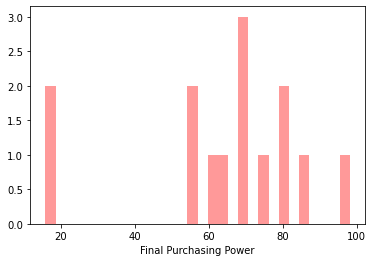

In [15]:
sns.distplot(decision_rank['Final Purchasing Power'],bins=30,kde=False,color='red')
print('Histogram of the Final Purchasing power frequency')
##exclude values velow 60 dollars

Boxplot of CO2 Emission Index


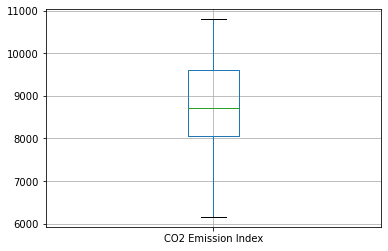

In [16]:
decision_rank['CO2 Emission Index']=decision_rank['CO2 Emission Index'].astype(float)
decision_rank.boxplot(column='CO2 Emission Index')
print('Boxplot of CO2 Emission Index')
##check upper outliners to exclude rows

Histogram of the Traffic Index


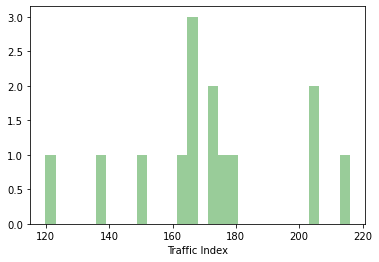

In [17]:
sns.distplot(decision_rank['Traffic Index'],bins=30,kde=False,color='g')
print('Histogram of the Traffic Index')
##values over 180 may be excludable

# City cuts

-The first city to analyse it's Miami, it has a very low monetary income compared to the other cities, and it has a high traffic punctuation joined with a large CO2 emission measure. So, even though it's the third city in the ranking, it has to go.

-The next cities on the spot are Houston and Atlanta. These cities have an average income but in the traffic and emissions columns we have high scores, in addition the 'good business ranking' number aren't the best.

-Oakland has a very low income in the 'final purchase power' and it's the last place in the ranking, so we're getting rid of them.


In [43]:
dec_rnk=decision_rank.drop(decision_rank.index[[1,6,10,13]])
dec_rnk


,city,rank,Cost of living plus rent,Local purchasing power,Final Purchasing Power,Traffic Index,CO2 Emission Index
0,Orlando,1,54.36,109.64,55.28,178.59,9649.50
2,Austin,4,56.27,136.15,79.88,162.41,8323.00
3,Tampa,5,59.55,114.95,55.40,173.19,9387.38
4,Charlotte,6,59.26,128.65,69.39,167.24,8712.75
5,Raleigh,8,52.69,138.63,85.94,150.65,7968.35
7,Denver,10,63.03,123.91,60.88,173.60,8640.65
8,Fort Worth,11,51.45,125.78,74.33,119.84,6157.77
9,Jacksonville,12,51.46,120.32,68.86,174.64,9453.23
11,Dallas,15,55.96,154.13,98.17,165.75,8691.00
12,San Antonio,16,50.16,115.21,65.05,136.52,6652.72


# 'Companies' database analysis

In [18]:
from pymongo import MongoClient
client=MongoClient()
db=client.companies

In [19]:
colect = db.companies

The enterprise will be a music srteaming app, so the location will be based in a zone delimited by the 3 top cites, and will be close to companies dedicated to music and software for building a good contact network.

In [36]:
msc=list(colect.find({'$and':[{'category_code':'music'},{'offices.country_code':'USA'},
                              {'offices':{'$size':1}}]},{'offices':1}))
msc

14

In [21]:
sftw=list(colect.find({'$and':[{'category_code':'software'},{'offices.country_code':'USA'},
                              {'offices':{'$size':1}}]},{'offices':1}))
sftw

[{'_id': ObjectId('52cdef7c4bab8bd675297d8c'),
  'offices': [{'description': 'Headquarters',
    'address1': '4900 Hopyard Rd',
    'address2': 'Suite 310',
    'zip_code': '94588',
    'city': 'Pleasanton',
    'state_code': 'CA',
    'country_code': 'USA',
    'latitude': 37.692934,
    'longitude': -121.904945}]},
 {'_id': ObjectId('52cdef7c4bab8bd675297e21'),
  'offices': [{'description': '',
    'address1': '700 Airport Blvd',
    'address2': '',
    'zip_code': '94010',
    'city': 'Burlingame',
    'state_code': 'CA',
    'country_code': 'USA',
    'latitude': None,
    'longitude': None}]},
 {'_id': ObjectId('52cdef7c4bab8bd675297e24'),
  'offices': [{'description': 'The ACTIVE Network',
    'address1': '10182 Telesis Court,',
    'address2': 'Suite 100',
    'zip_code': '92121',
    'city': 'San Diego',
    'state_code': 'CA',
    'country_code': 'USA',
    'latitude': 39.9195028,
    'longitude': -105.1110024}]},
 {'_id': ObjectId('52cdef7c4bab8bd675297e30'),
  'offices': [{'

In [32]:
msc[0].keys()
a=msc[0]['offices']
b=pd.DataFrame(a)
b
a

[{'description': '',
  'address1': '16935 W. Bernardo Dr. Suite 101',
  'address2': '',
  'zip_code': '92127',
  'city': 'San Diego',
  'state_code': 'CA',
  'country_code': 'USA',
  'latitude': 33.022176,
  'longitude': -117.081406}]

In [52]:
msc1=[]
for i in range(len(msc)):
    ct=msc[i]['offices'][0]['city']
    s_c=msc[i]['offices'][0]['state_code']
    la=msc[i]['offices'][0]['latitude']
    lo=msc[i]['offices'][0]['longitude']
    zip_=msc[i]['offices'][0]['zip_code']
    row_ = {"city": ct,"State":s_c,'Latitude':la,'Longitude':lo,'ZIP':zip_}
    msc1.append(row_)
    
msc1_df=pd.DataFrame(msc1)
    
msc1_df
    


,city,State,Latitude,Longitude,ZIP
0,San Diego,CA,33.022176,-117.081406,92127
1,New York,NY,40.725435,-73.997395,10012
2,San Francisco,CA,37.779624,-122.391236,94107
3,Chelmsford,MA,42.591704,-71.319348,01824
4,Long Island City,NY,40.747311,-73.954918,11101
5,Santa Monica,CA,37.412577,-121.916861,90401
6,San Francisco,CA,37.765420,-122.411938,94103
7,Framingham,MA,42.272486,-71.424992,01702
8,Atlanta,GA,33.748600,-84.388400,30325
9,Atlanta,GA,33.748600,-84.388400,30325


In [42]:
sftw1=[]
for i in range(len(sftw)):
    ct_=sftw[i]['offices'][0]['city']
    s_c_=sftw[i]['offices'][0]['state_code']
    la_=sftw[i]['offices'][0]['latitude']
    lo_=sftw[i]['offices'][0]['longitude']
    zip__=sftw[i]['offices'][0]['zip_code']
    row__ = {"city": ct_,"State":s_c_,'Latitude':la_,'Longitude':lo_,'ZIP':zip__}
    sftw1.append(row__)
    
sftw_df=pd.DataFrame(sftw1)
    
sftw_df

,city,State,Latitude,Longitude,ZIP
0,Pleasanton,CA,37.692934,-121.904945,94588
1,Burlingame,CA,NaN,NaN,94010
2,San Diego,CA,39.919503,-105.111002,92121
3,San Francisco,CA,37.782263,-122.392142,94111
4,Austin,TX,30.407545,-97.717667,78746
...,...,...,...,...,...
1303,Dublin,CA,37.701940,-121.936698,94568
1304,Bohemia,NY,40.775055,-73.088140,11716
1305,Palm Beach,FL,26.705331,-80.041395,33480
1306,Livingston,NJ,40.793024,-74.323554,07039


We found that there are plenty software companies, so we´re going to narrow the list to our cities.

In [50]:
sft_city=pd.merge(sftw_df,dec_rnk,on='city',how='inner')

In [49]:
sft_city=pd.merge(sftw_df,dec_rnk,on='city',how='inner')
sft_city.drop(['Cost of living plus rent','Local purchasing power'], axis=1, inplace=True)
sft_city

,city,State,Latitude,Longitude,ZIP,rank,Final Purchasing Power,Traffic Index,CO2 Emission Index
0,Austin,TX,30.407545,-97.717667,78746,4,79.88,162.41,8323.00
1,Austin,TX,30.390071,-97.711652,78758,4,79.88,162.41,8323.00
2,Austin,TX,30.276460,-97.746387,78701,4,79.88,162.41,8323.00
3,Austin,TX,30.266520,-97.742937,78701,4,79.88,162.41,8323.00
4,Austin,TX,30.316226,-97.718130,78704,4,79.88,162.41,8323.00
...,...,...,...,...,...,...,...,...,...
62,Charlotte,NC,35.150561,-80.840953,28211,6,69.39,167.24,8712.75
63,Charlotte,NC,NaN,NaN,28203,6,69.39,167.24,8712.75
64,Tampa,FL,28.032975,-82.646110,33635,5,55.40,173.19,9387.38
65,Tampa,FL,27.944737,-82.526550,33609,5,55.40,173.19,9387.38


In [92]:
coord_mus = msc1_df[['Latitude','Longitude','city']]
coord_mus=coord_mus.dropna()
coord_mus['Latitude'] = pd.to_numeric(coord_mus['Latitude'])
coord_mus['Longitude'] = pd.to_numeric(coord_mus['Longitude'])
coord_mus


,Latitude,Longitude,city
0,33.022176,-117.081406,San Diego
1,40.725435,-73.997395,New York
2,37.779624,-122.391236,San Francisco
3,42.591704,-71.319348,Chelmsford
4,40.747311,-73.954918,Long Island City
5,37.412577,-121.916861,Santa Monica
6,37.765420,-122.411938,San Francisco
7,42.272486,-71.424992,Framingham
8,33.748600,-84.388400,Atlanta
9,33.748600,-84.388400,Atlanta


In [96]:
coord_sft = sft_city[['Latitude','Longitude','city']]
coord_sft=coord_sft.dropna()
coord_sft['Latitude'] = pd.to_numeric(coord_sft['Latitude'])
coord_sft['Longitude'] = pd.to_numeric(coord_sft['Longitude'])
coord_sft


,Latitude,Longitude,city
0,30.407545,-97.717667,Austin
1,30.390071,-97.711652,Austin
2,30.276460,-97.746387,Austin
3,30.266520,-97.742937,Austin
4,30.316226,-97.718130,Austin
...,...,...,...
61,29.584017,-98.570189,San Antonio
62,35.150561,-80.840953,Charlotte
64,28.032975,-82.646110,Tampa
65,27.944737,-82.526550,Tampa


In [99]:
coord_m = coord_mus[['Latitude','Longitude']]

In [70]:
al_map_=folium.Map([40,-90], zoom_start=4)

In [71]:
al_map_.add_child(plugins.HeatMap(coor, radius=20))

In [102]:
gradient = {.33: 'red', .66: 'brown', 1: 'green'}
al_map_.add_child(plugins.HeatMap(coord_m, radius=20,gradient=gradient))

In [103]:
dec_rnk

,city,rank,Cost of living plus rent,Local purchasing power,Final Purchasing Power,Traffic Index,CO2 Emission Index
0,Orlando,1,54.36,109.64,55.28,178.59,9649.50
2,Austin,4,56.27,136.15,79.88,162.41,8323.00
3,Tampa,5,59.55,114.95,55.40,173.19,9387.38
4,Charlotte,6,59.26,128.65,69.39,167.24,8712.75
5,Raleigh,8,52.69,138.63,85.94,150.65,7968.35
7,Denver,10,63.03,123.91,60.88,173.60,8640.65
8,Fort Worth,11,51.45,125.78,74.33,119.84,6157.77
9,Jacksonville,12,51.46,120.32,68.86,174.64,9453.23
11,Dallas,15,55.96,154.13,98.17,165.75,8691.00
12,San Antonio,16,50.16,115.21,65.05,136.52,6652.72


In relation with the map presented above we find that the best option is Austin, Texas. It is sorrounded by numerous software companies, in that city and in Dallas, wich are the needed points in our plan; and Atlanta is accesible on the road or with a quick trip on airplane to visit music agencies.